In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 6, 4

## Task 1 (5+5+5+5+5=25 pts)

### Consider the dataset HW2_task1.csv, a binary classification problem with two real-valued input attributes.  As you can see from the plot, the dataset is linearly separable. Train a linear SVM (setting C=100000 just to emphasize that no slack variables are allowed) and  answer the following five questions: 

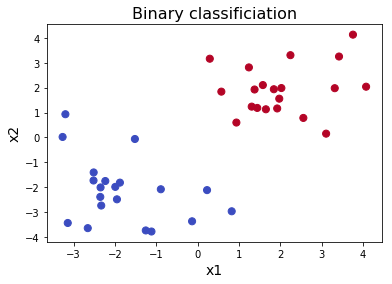

In [2]:
# Data
#From Professor's code in the class exercise notebook
data1=pd.read_csv('HW2_task1.csv')
X=data1.iloc[:,:2]
Y=data1.iloc[:,2]
plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.title('Binary classificiation', fontsize = 16)
plt.xlabel('x1', fontsize = 14)
plt.ylabel('x2', fontsize = 14)
plt.show()

#### a. Report the separating hyperplane (line).

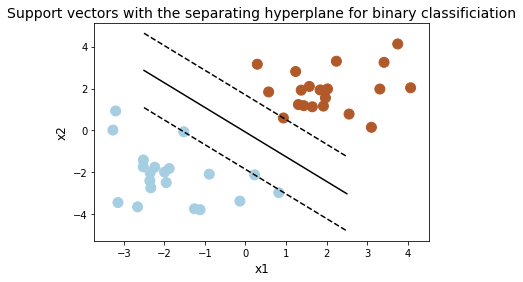

In [3]:
# your code here
#From Professor's code in the class exercise notebook
from sklearn import svm

# Fit the model.  Using a linear SVM; very large penalty for misclassification.
# Since the data is linearly separable, it won't misclassify any points.
clf = svm.SVC(kernel='linear',C=100000)  
clf.fit(X, Y)

# get the separating hyperplane w[0] x1 + w[1] x2 + intercept = 0
# transform to slope-intercept form: x2 = (-w[0]/w[1])x1 - (intercept/w[1])
w = clf.coef_[0]
a = -w[0] / w[1]
x1 = np.linspace(-2.5, 2.5)

#equation of the hyperplane
x2 = a * x1 - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane (slope = a) that go through the support vectors.

b = clf.support_vectors_[0]
x2_down = a * x1 + (b[1] - a * b[0])

b = clf.support_vectors_[-1]
x2_up = a * x1 + (b[1] - a * b[0])

# plot the line, the points, and the nearest vectors to the plane
plt.gca()
plt.plot(x1, x2, 'k-')
plt.plot(x1, x2_down, 'k--')
plt.plot(x1, x2_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none')
plt.scatter(X.values[:, 0], X.values[:, 1], c=Y, cmap=plt.cm.Paired,s=100)

plt.title('Support vectors with the separating hyperplane for binary classificiation', fontsize = 14)
plt.xlabel('x1', fontsize = 12)
plt.ylabel('x2', fontsize = 12)

plt.axis('tight')
plt.show()

In [4]:
x2 = a * x1 - (clf.intercept_[0]) / w[1]

print("The equation of the  hyperplane is: x2 = {} * x1 - {}".
      format(round(a,3),round((clf.intercept_[0]) / w[1],3)))

The equation of the  hyperplane is: x2 = -1.177 * x1 - 0.077


#### b. List the support vectors.

In [5]:
print("List of support vectors:")
clf.support_vectors_

List of support vectors:


array([[ 0.22627536, -2.11810965],
       [-1.5180363 , -0.06399383],
       [ 0.93564585,  0.5969359 ]])

In [6]:
clf.n_support_ 

array([2, 1], dtype=int32)

#### c. Calculate the upper and lower hyperplanes (lines) of the margin.

In [7]:
# your code here
#Calculated in part A
b = clf.support_vectors_[0]
x2_down = a * x1 + (b[1] - a * b[0])
print("The lower hyperplane (line) of the margin is: x2 = {} * x1 + {}".format(round(a,3),round(b[1] - a * b[0],3)))


b = clf.support_vectors_[-1]
x2_up = a * x1 + (b[1] - a * b[0])

print("The upper hyperplane (line) of the margin is: x2 = {} * x1 +  {}".format(round(a,3),round(b[1] - a * b[0],3)))

The lower hyperplane (line) of the margin is: x2 = -1.177 * x1 + -1.852
The upper hyperplane (line) of the margin is: x2 = -1.177 * x1 +  1.698


#### d. Compute the width of the margin.

In [8]:
# your code here
#np.sqrt((np.power(w[0],2) + np.power(w[1],2)),0.5)

margin_width = 2.0/np.sqrt(np.sum(w**2))
print("margin width is (distance between the two hyperplanes)", margin_width)

margin width is (distance between the two hyperplanes) 2.29779935043


#### e. What would you expect to happen to the margin if the constant C was made very small?

The C parameter helps in optimizing SVM by avoiding misclassifcation of training samples. If the C is tuned to be large, SVM optimizer will choose a smaller margin hyperplane (margin width will decrease with increase in C), and thus will achieve higher accuracy of binary classfication. On the other hand, if the C is small then the optimizer will choose a larger margin hyperplane (margin width will incease with decrease in C), and thus will lead to having misclassified training data. 


## Task 2 (4+8+8=20 pts)

### Given the dataset provided below, answer the following two questions:

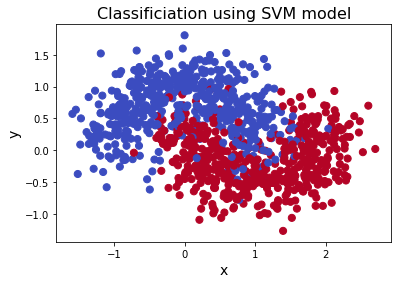

In [9]:
# Data 
#From Professor's code in the class exercise notebook


data2=pd.read_csv('HW2_task2.csv')
X=data2.iloc[:,:2]
Y=data2.iloc[:,2]

plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));
plt.title('Classificiation using SVM model', fontsize = 16)
plt.xlabel('x', fontsize = 14)
plt.ylabel('y', fontsize = 14)
plt.show()



# Generate training (X_train, Y_train) and testing (X_test, Y_test) datasets for out of sample test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

### a. Train a polynomial SVM using the training set. Use the default arguments, and report both in-sample (training set) and out-of-sample (test set) classification accuracy.

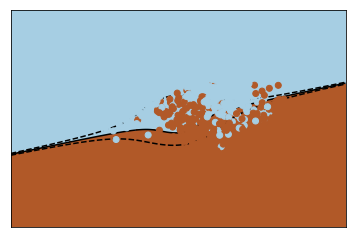

Out of sample, we successfully predict 83.0 percent of the data using a Polynomial kernel
In sample, we successfully predict 81.0 percent of the data using a Polynomial kernel


In [10]:
# your code here
#From Professor's code in the class exercise notebook


# Now let's use polynomial kernel with degree 2 
clf2 = svm.SVC(kernel='poly') 
clf2.fit(X_train, Y_train)

# Plot the line, the points, and the nearest vectors to the plane

plt.clf()

plt.scatter(clf2.support_vectors_[:, 0], clf2.support_vectors_[:, 1], s=80,
            facecolors='none', zorder=10)
plt.scatter(X_train.values[:, 0], X_train.values[:, 1], c=Y_train, zorder=10, cmap=plt.cm.Paired)


################################################################################
plt.axis('tight')
x_min = -3
x_max = 3
y_min = -3
y_max = 3

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf2.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)

plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-.5, 0, .5])

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())
plt.show()

correct=1.0*(clf2.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
correct_insample=1.0*(clf2.predict(X_train)==np.asarray(Y_train)).sum()/len(Y_train)



print("Out of sample, we successfully predict {} percent of the data using a Polynomial kernel".
      format(round((correct)*100),3))


print("In sample, we successfully predict {} percent of the data using a Polynomial kernel".
      format(round((correct_insample)*100),3))

### Next we will use the validation subset in order to pick the optimal parameters for the polynomial model.

### b. Try polynomials of degree 1,2,3,4. For each degree, consider a variety of regularization constants from the range C=[math.exp(i) for i in np.linspace(-10,2*degree,200)] in order to evaluate the classifier performance over the validation set defined below.  Plot the graph of "Accuracy vs log(C)" for each degree.


            0         1
0    0.000045  0.666667
1    0.000048  0.666667
2    0.000051  0.666667
3    0.000054  0.666667
4    0.000058  0.666667
5    0.000061  0.666667
6    0.000065  0.666667
7    0.000069  0.666667
8    0.000074  0.666667
9    0.000078  0.666667
10   0.000083  0.666667
11   0.000088  0.666667
12   0.000094  0.666667
13   0.000099  0.666667
14   0.000106  0.666667
15   0.000112  0.666667
16   0.000119  0.666667
17   0.000127  0.666667
18   0.000134  0.666667
19   0.000143  0.666667
20   0.000152  0.666667
21   0.000161  0.666667
22   0.000171  0.666667
23   0.000182  0.666667
24   0.000193  0.666667
25   0.000205  0.666667
26   0.000218  0.666667
27   0.000231  0.666667
28   0.000246  0.666667
29   0.000261  0.666667
..        ...       ...
170  1.285640  0.815315
171  1.365551  0.815315
172  1.450429  0.815315
173  1.540583  0.819820
174  1.636340  0.819820
175  1.738050  0.824324
176  1.846082  0.819820
177  1.960828  0.819820
178  2.082707  0.819820
179  2.212161  0

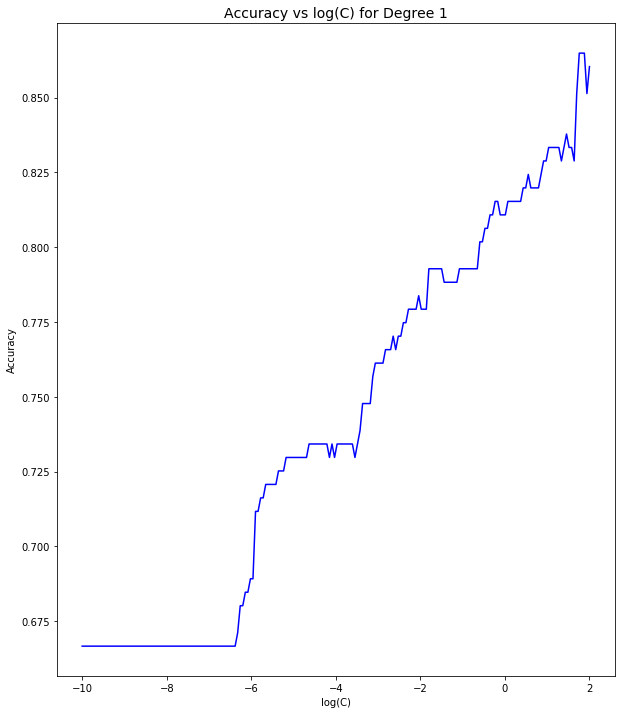

In [11]:
# Next we generate validation data (X_vali, Y_vali) from the training dataset. 
# Denote the remaining training data by (X_train_1, Y_train_1).
#From Professor's code in the class exercise notebook


X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(X_train, Y_train, test_size=0.33, random_state=99)

# your code here

C = [np.exp(i) for i in np.linspace(-10,2*1,200)] 
OS_validation1=[]
for    c in C:
    clf = svm.SVC(kernel='poly',C=c) 
    clf.fit(X_train_1, Y_train_1)
    correct=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali) # OS score for validation set
    OS_validation1.append(correct)
    
temp=pd.DataFrame([C,OS_validation1]).T # put results together.
print(temp)

print("Maximum for Degree 1", max(OS_validation1))

C=[np.log(y) for y in C] # for a better graph
plt.figure(figsize=(10,12))


plt.gca()

plt.plot(C,OS_validation1,'b',)
plt.legend(loc='upper right')
plt.title('Accuracy vs log(C) for Degree 1', fontsize = 14)
plt.ylabel('Accuracy')
plt.xlabel('log(C)')
plt.show()


             0         1
0     0.000045  0.666667
1     0.000049  0.666667
2     0.000052  0.666667
3     0.000056  0.666667
4     0.000060  0.666667
5     0.000065  0.666667
6     0.000069  0.666667
7     0.000074  0.666667
8     0.000080  0.666667
9     0.000086  0.666667
10    0.000092  0.666667
11    0.000098  0.666667
12    0.000106  0.666667
13    0.000113  0.666667
14    0.000122  0.666667
15    0.000130  0.666667
16    0.000140  0.666667
17    0.000150  0.666667
18    0.000161  0.666667
19    0.000173  0.666667
20    0.000185  0.666667
21    0.000199  0.666667
22    0.000213  0.666667
23    0.000229  0.666667
24    0.000246  0.666667
25    0.000264  0.666667
26    0.000283  0.666667
27    0.000303  0.666667
28    0.000325  0.666667
29    0.000349  0.666667
..         ...       ...
170   7.097900  0.851351
171   7.615234  0.860360
172   8.170275  0.864865
173   8.765769  0.864865
174   9.404667  0.869369
175  10.090131  0.869369
176  10.825555  0.869369
177  11.614581  0.869369


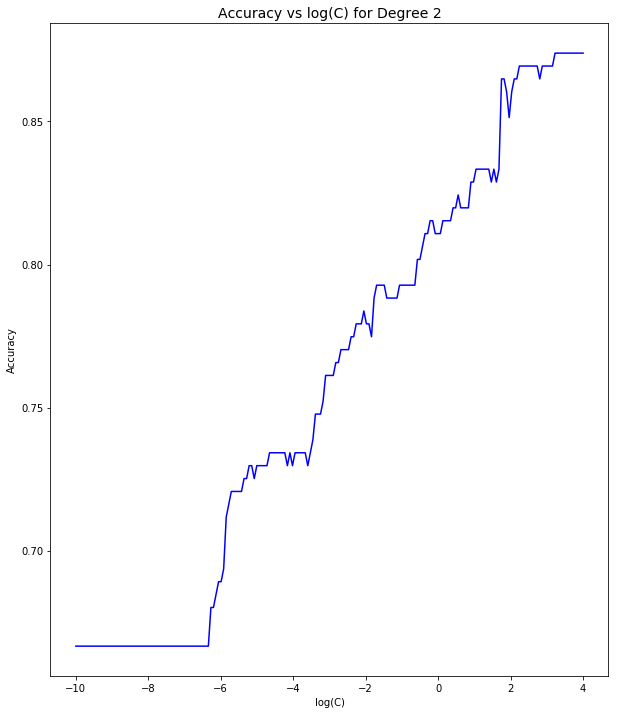

In [13]:
C = [np.exp(i) for i in np.linspace(-10,2*2,200)] 
OS_validation2=[]
for c in C:
    clf = svm.SVC(kernel='poly',C=c) 
    clf.fit(X_train_1, Y_train_1)
    correct=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali) # OS score for validation set
    OS_validation2.append(correct)
    
temp=pd.DataFrame([C,OS_validation2]).T # put results together.
print(temp)
print("Maximum for Degree 2", max(OS_validation2))
C=[np.log(y) for y in C] # for a better graph
plt.figure(figsize=(10,12))

plt.gca()
plt.plot(C,OS_validation2,'b',)
plt.legend(loc='upper right')
plt.ylabel('Accuracy')
plt.xlabel('log(C)')
plt.title('Accuracy vs log(C) for Degree 2', fontsize = 14)


plt.show()

              0         1
0      0.000045  0.666667
1      0.000049  0.666667
2      0.000053  0.666667
3      0.000058  0.666667
4      0.000063  0.666667
5      0.000068  0.666667
6      0.000074  0.666667
7      0.000080  0.666667
8      0.000086  0.666667
9      0.000094  0.666667
10     0.000101  0.666667
11     0.000110  0.666667
12     0.000119  0.666667
13     0.000129  0.666667
14     0.000140  0.666667
15     0.000152  0.666667
16     0.000164  0.666667
17     0.000178  0.666667
18     0.000193  0.666667
19     0.000209  0.666667
20     0.000227  0.666667
21     0.000246  0.666667
22     0.000266  0.666667
23     0.000289  0.666667
24     0.000313  0.666667
25     0.000339  0.666667
26     0.000367  0.666667
27     0.000398  0.666667
28     0.000431  0.666667
29     0.000467  0.666667
..          ...       ...
170   39.186869  0.873874
171   42.467697  0.873874
172   46.023205  0.873874
173   49.876390  0.873874
174   54.052173  0.873874
175   58.577564  0.873874
176   63.481

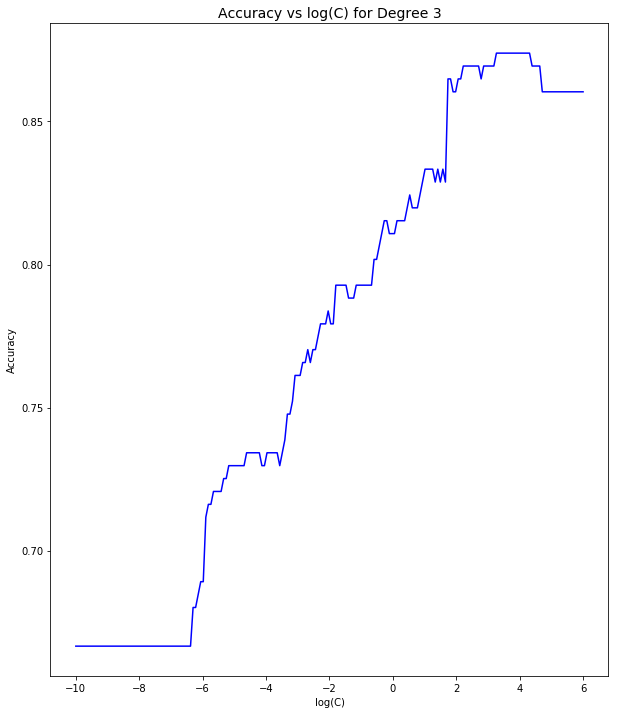

In [14]:
C = [np.exp(i) for i in np.linspace(-10,2*3,200)] 
OS_validation3=[]
for c in C:
    clf = svm.SVC(kernel='poly',C=c) 
    clf.fit(X_train_1, Y_train_1)
    correct=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali) # OS score for validation set
    OS_validation3.append(correct)
    
temp=pd.DataFrame([C,OS_validation3]).T # put results together.
print(temp)

print("Maximum for Degree 3", max(OS_validation3))
C=[np.log(y) for y in C] # for a better graph
plt.figure(figsize=(10,12))


plt.gca()
plt.plot(C,OS_validation3,'b',)
plt.legend(loc='upper right')
plt.ylabel('Accuracy')
plt.xlabel('log(C)')
plt.title('Accuracy vs log(C) for Degree 3', fontsize = 14)


plt.show()

               0         1
0       0.000045  0.666667
1       0.000050  0.666667
2       0.000054  0.666667
3       0.000060  0.666667
4       0.000065  0.666667
5       0.000071  0.666667
6       0.000078  0.666667
7       0.000086  0.666667
8       0.000094  0.666667
9       0.000102  0.666667
10      0.000112  0.666667
11      0.000123  0.666667
12      0.000134  0.666667
13      0.000147  0.666667
14      0.000161  0.666667
15      0.000176  0.666667
16      0.000193  0.666667
17      0.000211  0.666667
18      0.000231  0.666667
19      0.000253  0.666667
20      0.000277  0.666667
21      0.000303  0.666667
22      0.000332  0.666667
23      0.000364  0.666667
24      0.000398  0.666667
25      0.000436  0.666667
26      0.000477  0.666667
27      0.000522  0.666667
28      0.000571  0.666667
29      0.000626  0.666667
..           ...       ...
170   216.347178  0.860360
171   236.828603  0.860360
172   259.248988  0.860360
173   283.791895  0.860360
174   310.658261  0.860360
1

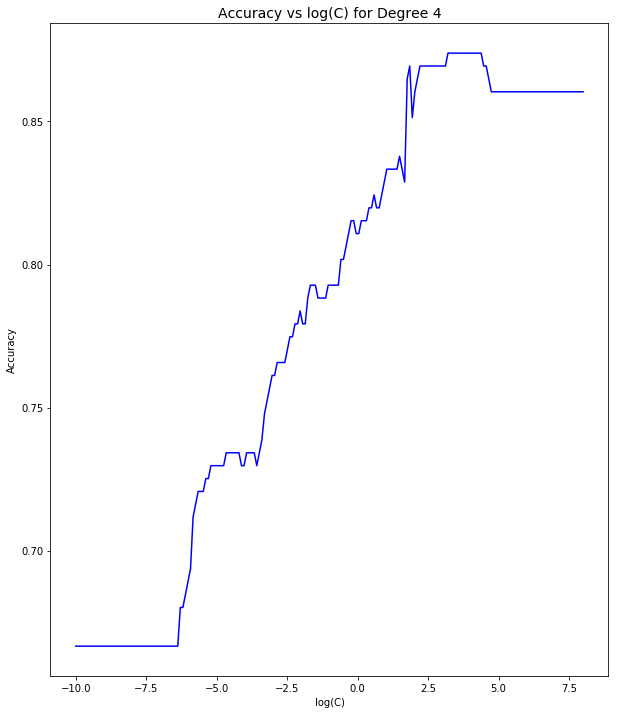

In [15]:
C = [np.exp(i) for i in np.linspace(-10,2*4,200)] 
OS_validation4=[]
for c in C:
    clf = svm.SVC(kernel='poly',C=c) 
    clf.fit(X_train_1, Y_train_1)
    correct=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali) # OS score for validation set
    OS_validation4.append(correct)
    
temp=pd.DataFrame([C,OS_validation4]).T # put results together.
print(temp)

C=[np.log(y) for y in C] # for a better graph
print("Maximum for Degree 4", max(OS_validation4))
plt.figure(figsize=(10,12))

plt.gca()
plt.plot(C,OS_validation4,'b',)
plt.legend(loc='upper right')
plt.ylabel('Accuracy')
plt.xlabel('log(C)')
plt.title('Accuracy vs log(C) for Degree 4', fontsize = 14)


plt.show()

### c. Choose the optimal degree and the optimal regularization constant C based on these graphs.  Use the optimal degree and C to compute and report the final out-of-sample accuracy of the best classification model selected. 

In [16]:
# your code here
#Based on the above charts
clf_c = svm.SVC(kernel='poly',degree =3, C=np.exp(3.3))
clf_c.fit(X_train, Y_train)
correct=1.0*(clf_c.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
print("Out of sample, we successfully predict {} percent of the data using a polynomial kernel".format((correct)*100))

Out of sample, we successfully predict 89.0909090909091 percent of the data using a polynomial kernel


## Task 3 (5+5=10pts).

### This task is to be done by hand rather than using Python.

Assume you have a data set as below. It contains records of cars with three features: the type of the car (sports or SUV), the color of the car (red or yellow), and the origin of the car (domestic or imported). And the labels for the data are yes (car was stolen) and no (car was not stolen).

CarType,Color,Origin,Stolen?

sports,red,domestic,yes

sports,red,domestic,yes

sports,red,domestic,yes

SUV,red,domestic,no

SUV,red,imported,yes

SUV,yellow,imported,no

SUV,yellow,imported,yes

SUV,yellow,domestic,no

sports,yellow,imported,no

sports,red,imported,yes


### a) Calculate the following sample probabilities:

P(Yes) = 6/10 = 0.6

P(No) = 4/10 = 0.4

P(Red|Yes) = (5/10)/0.6 = 0.83

P(SUV|Yes)= (2/10)/(0.6) = 0.33

P(Domestic|Yes) = (3/10)/0.6 = 0.5

P(Red|No) = (1/10)/0.4 = 0.25

P(SUV|No) = (3/10)/0.4 = 0.75

P(Domestic|No) = (2/10)/0.4 = 0.5

### b) Using naive Bayes classification, what is the probability that a red, domestic SUV will be stolen?
P(Yes|Red,Domestic, SUV) = P(Red,Domestic,SUV|Yes) / (P(Red) * P(Domestic) * P(SUV))
                     = ((P(Red|Yes) * P(Domestic|Yes) *  P(SUV|Yes)) * P(Yes)) /(P(Red) * P(Domestic)* 
                     P(SUV))
                     
((P(Red|Yes) * P(Domestic|Yes) * P(SUV|Yes)) * P(Yes)) = 0.83 * 0.5 * 0.33 * 0.6 = 0.082

((P(Red|No) * P(Domestic|No) * P(SUV|No)) * P(No)) = 0.25 * 0.5 * 0.75 * 0.4 = 0.038


P(Yes|Red,Domestic, SUV) = 0.082/(0.082+0.038) = 0.687 = 0.69 (After rounding off to two decimal places)



## Task 4 (4+2+2+2=10pts)

Consider the following problem involving Gaussian Naive Bayes classification.  We use eight factors to predict if people have diabetes or not. The variables are:

y: The label (0 - no diabetes, 1 - diabetes)

t_pre: Number of times pregnant

glu: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

blood_p: Diastolic blood pressure (mm Hg)

triceps: Triceps skin fold thickness (mm)

serum: 2-Hour serum insulin (mu U/ml)

b_m: Body mass index (weight in kg/(height in m)^2)

pedigree_f: Diabetes pedigree function

age: Age (years)

### Using the data provided below, learn a Naive Bayes classifier from the training data and answer the following questions: 

In [17]:
# Training data
data_train=pd.read_csv("HW2_task4_train.csv") 
y_train=data_train.iloc[:,1] 
X_train=data_train.iloc[:,2:] 

# Testing data
data_test=pd.read_csv("HW2_task4_test.csv")
y_test=data_test.iloc[:,1]
X_test=data_test.iloc[:,2:]

print(X_train.head())

   t_pre    glu  blood_p  triceps  serum   b_m  pedigree_f   age
0    3.0  158.0     64.0     13.0  387.0  31.2       0.295  24.0
1    0.0   84.0     64.0     22.0   66.0  35.8       0.545  21.0
2    9.0  120.0     72.0     22.0   56.0  20.8       0.733  48.0
3    4.0  110.0     76.0     20.0  100.0  28.4       0.118  27.0
4    2.0  100.0     66.0     20.0   90.0  32.9       0.867  28.0


In [18]:
y_train.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    1.0
Name: y, dtype: float64

### a) What is the prediction accuracy for Naive Bayes, both in sample (on the training data) and out of sample (on the test data)?

In [19]:
# your code here
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
trained_model = gnb.fit(X_train,y_train)
y_pred_train = trained_model.predict_proba(X_train)[:,1]
y_pred_test = trained_model.predict_proba(X_test)[:,1]

# measure accuracy for the binary prediction task
print('In sample prediction accuracy:',1.0*sum((y_pred_train>0.5)==y_train)/len(y_train))
print('Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_test)/len(y_test))




In sample prediction accuracy: 0.758474576271
Out of sample prediction accuracy: 0.791139240506


### b) What is the prior probability of diabetes, learned from the training data?

In [20]:
# your code here
print("prior probability of diabetes is {}".format(round(trained_model.class_prior_[1], 3)))

prior probability of diabetes is 0.301


### c) What is the mean and variance of each input variable for patients with diabetes?

In [21]:
# your code here
print("mean for patients with diabetes is (in the order of t_pre, glu, blood_p, tricepts, serum, b_m, pedigree_f, age):", trained_model.theta_[1])
print("\n")
print("variance for patients with diabetes is (in the order of t_pre, glu, blood_p, tricepts, serum, b_m, pedigree_f, age):", trained_model.sigma_[1])

mean for patients with diabetes is (in the order of t_pre, glu, blood_p, tricepts, serum, b_m, pedigree_f, age): [   4.07042254  144.14084507   74.56338028   33.47887324  209.21126761
   35.22394366    0.63904225   35.78873239]


variance for patients with diabetes is (in the order of t_pre, glu, blood_p, tricepts, serum, b_m, pedigree_f, age): [  1.22063203e+01   9.24768907e+02   1.87738953e+02   9.39678755e+01
   1.58820540e+04   3.86170444e+01   1.90055014e-01   1.03856786e+02]


### d) What is the mean and variance of each input variable for patients without diabetes?

In [22]:
# your code here
print("mean for patients without diabetes is (in the order of t_pre, glu, blood_p, tricepts, serum, b_m, pedigree_f, age):", trained_model.theta_[0])

print("\n")

print("variance for patients without diabetes is (in the order of t_pre, glu, blood_p, tricepts, serum, b_m, pedigree_f, age):", trained_model.sigma_[0])

mean for patients without diabetes is (in the order of t_pre, glu, blood_p, tricepts, serum, b_m, pedigree_f, age): [   2.69090909  111.46666667   69.20606061   27.2         127.00606061
   31.70909091    0.46868485   28.39393939]


variance for patients without diabetes is (in the order of t_pre, glu, blood_p, tricepts, serum, b_m, pedigree_f, age): [  6.77114149e+00   6.05994355e+02   1.36369672e+02   1.08269103e+02
   8.31898785e+03   3.99219294e+01   8.46144012e-02   7.24448238e+01]


## Task 5 (10+15=25 pts)

We have an artificial data set split, where the training set contains both labeled and unlabeled data. Column 'y' is the label, and columns '0','1','2' are categorical variables.

In [23]:
data_train=pd.read_csv("HW2_task5_train.csv")
y_Labeled_train=data_train.iloc[:,1] 
X_Labeled_train=data_train.iloc[:,2:] 

data_test=pd.read_csv("HW2_task5_test.csv")
y_Labeled_test=data_test.iloc[:,1]
X_Labeled_test=data_test.iloc[:,2:]

data_Unlabeled=pd.read_csv("HW2_task5_unlabeled.csv")
X_Unlabeled_train=data_Unlabeled.iloc[:,1:]

print(X_Labeled_train,"\n")

print(y_Labeled_train)

   0  1  2
0  4  6  6
1  2  2  2
2  2  6  2
3  6  6  6
4  1  2  2
5  3  4  4
6  6  1  6
7  1  3  1
8  5  1  6 

0    0
1    1
2    0
3    0
4    1
5    0
6    0
7    1
8    1
Name: y, dtype: int64


### a) Learn a discrete Naive Bayes classifier from  X_Labeled_train, use it to predict the labels of X_Labeled_test, and report the classification accuracy.

In [24]:
# Training a binary Naive Bayes Classifier with discrete input attributes.
# Assume that the binary output variable takes on values 0 or 1. 

#From professors' class exercise notebook
def trainNaiveBayesDiscrete(X,y):
    prior = 1.*y.sum()/y.count()
    nbc = {'prior':prior}
    X_1 = X[y==1]
    X_0 = X[y==0]
    for j in X.columns:
        nbc[j+'_1'] = X_1[j].value_counts(normalize=True)
        nbc[j+'_0'] = X_0[j].value_counts(normalize=True)
    return nbc

def testNaiveBayesDiscrete(X,nbc):
    y_pred = pd.Series(index=X.index)
    for i in X.index:
        # compute odds of y=1
        y_pred[i] = nbc['prior']/(1-nbc['prior']) # prior odds
        for j in X.columns:
            thevalue = X.loc[i,j]
            if thevalue not in nbc[j+'_1']:
                y_pred[i] = y_pred[i]*1E-3
            if thevalue not in nbc[j+'_0']:
                y_pred[i] = y_pred[i]*1E3
            if (thevalue in nbc[j+'_1']) & (thevalue in nbc[j+'_0']):
                y_pred[i] = y_pred[i]*(nbc[j+'_1'][thevalue]+1E-3)/(nbc[j+'_0'][thevalue]+1E-3)
        # convert odds to probability of y=1
        y_pred[i] = y_pred[i]/(1.0+y_pred[i])
    return y_pred

In [25]:
# your code here
#From professors' class exercise notebook

naive_bayes_classifier = trainNaiveBayesDiscrete(X_Labeled_train,y_Labeled_train)

y_pred_test = testNaiveBayesDiscrete(X_Labeled_test,naive_bayes_classifier)

# measure accuracy for the binary prediction task
print('Out of sample prediction accuracy is {}%:'.format(round(1.0*sum((y_pred_test>0.5)==y_Labeled_test)/len(y_Labeled_test),4)*100))

Out of sample prediction accuracy is 69.44%:


### b) Improve the classification by using the unlabeled data, data_Unlabeled, and the EM semi-supervised algorithm to predict the labels of X_Labeled_test, and report the new accuracy.

In [26]:
##From professors' class exercise notebook

def initializeNaiveBayesRandom(X_Unlabeled):
    nbc = {'prior':0.5}
    for j in X_Unlabeled.columns:
        thevalues = X_Unlabeled[j].unique()
        nbc[j+'_1'] = {}
        nbc[j+'_0'] = {}
        for jj in thevalues:
            nbc[j+'_1'][jj] = np.random.rand()
            nbc[j+'_0'][jj] = np.random.rand()
    return nbc
    
def EM(X_Labeled,y_Labeled,X_Unlabeled,num_iters):

    # initialize
    
    t = 0
    
    if len(y_Labeled) > 0:
        nbc = trainNaiveBayesDiscrete(X_Labeled,y_Labeled)
    else:
        nbc = initializeNaiveBayesRandom(X_Unlabeled)
    
    while True:
        t = t + 1
        print('Iteration',t,'of',num_iters)
        
        # E step - classify with nbc for unlabeled data only
        y_pred_Unlabeled = testNaiveBayesDiscrete(X_Unlabeled,nbc)
        
        # M step
        X_for_M_step = pd.concat([X_Labeled,X_Unlabeled]).reset_index(drop=True)
        y_for_M_step = pd.concat([y_Labeled,y_pred_Unlabeled]).reset_index(drop=True)
        prior = 1.*y_for_M_step.sum()/y_for_M_step.count()
        nbc = {'prior':prior}
        for j in X_for_M_step.columns:
            nbc[j+'_1'] = {}
            nbc[j+'_0'] = {}
            for theindex in X_for_M_step.index:
                current_X = X_for_M_step.loc[theindex,j]
                current_y = y_for_M_step.loc[theindex]
                if current_X in nbc[j+'_1']:
                    nbc[j+'_1'][current_X] += current_y
                else:
                    nbc[j+'_1'][current_X] = current_y
                if current_X in nbc[j+'_0']:
                    nbc[j+'_0'][current_X] += (1.0-current_y)
                else:
                    nbc[j+'_0'][current_X] = 1.0-current_y
            # normalize probabilities
            tempsum = 0.0
            for k in nbc[j+'_1']:
                tempsum += nbc[j+'_1'][k]
            for k in nbc[j+'_1']:
                nbc[j+'_1'][k] /= tempsum
            tempsum = 0.0
            for k in nbc[j+'_0']:
                tempsum += nbc[j+'_0'][k]
            for k in nbc[j+'_0']:
                nbc[j+'_0'][k] /= tempsum            
                       
        if t==num_iters:
            break
            
    return nbc

In [27]:
# your code here
naive_bayes_classifier=EM(X_Labeled_train,y_Labeled_train,X_Unlabeled_train,num_iters=50);

y_pred_test = testNaiveBayesDiscrete(X_Labeled_test,naive_bayes_classifier)

# measure accuracy for the binary prediction task 
print('Out of sample prediction accuracy is {}%'.format(round(1.0*sum((y_pred_test>0.5)==y_Labeled_test)/len(y_Labeled_test),4)*100))

Iteration 1 of 50
Iteration 2 of 50
Iteration 3 of 50
Iteration 4 of 50
Iteration 5 of 50
Iteration 6 of 50
Iteration 7 of 50
Iteration 8 of 50
Iteration 9 of 50
Iteration 10 of 50
Iteration 11 of 50
Iteration 12 of 50
Iteration 13 of 50
Iteration 14 of 50
Iteration 15 of 50
Iteration 16 of 50
Iteration 17 of 50
Iteration 18 of 50
Iteration 19 of 50
Iteration 20 of 50
Iteration 21 of 50
Iteration 22 of 50
Iteration 23 of 50
Iteration 24 of 50
Iteration 25 of 50
Iteration 26 of 50
Iteration 27 of 50
Iteration 28 of 50
Iteration 29 of 50
Iteration 30 of 50
Iteration 31 of 50
Iteration 32 of 50
Iteration 33 of 50
Iteration 34 of 50
Iteration 35 of 50
Iteration 36 of 50
Iteration 37 of 50
Iteration 38 of 50
Iteration 39 of 50
Iteration 40 of 50
Iteration 41 of 50
Iteration 42 of 50
Iteration 43 of 50
Iteration 44 of 50
Iteration 45 of 50
Iteration 46 of 50
Iteration 47 of 50
Iteration 48 of 50
Iteration 49 of 50
Iteration 50 of 50
Out of sample prediction accuracy is 94.44%
